Для набора значений в приложенном файле data.xlsх

Провести аппроксимацию данных функцией вида: $\exp\left(-\frac{x^2}{s^2}\right)$

По результатам аппроксимации определить среднеквадратическое отклонение s. Построить графики. Определить простое среднее значение функции в интервале значений х. Вычислить производную и интеграл от функции, значения которой определены в столбце у. Определить область экстремума. Рекомендации: в библиотеке scipy.optimize содержится набор функций для проведения процедуры аппроксимации.

In [109]:
import pandas as pd
import numpy as np
import scipy.integrate as Int
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [29]:
data = pd.read_excel(
    io='./files/data.xlsx'
)

In [49]:
x, y = np.array(data['x'].to_list()), np.array(data['y'].to_list())

In [74]:
y_mean = np.mean(y)
y_rms = np.std(y)
print(f'Среднее значение:               {y_mean}')
print(f'Среднеквадратичное отклонение:  {y_rms}')
print(f'Значение экстремума:            {np.max(y)}')

Среднее значение:               0.3250045774
Среднеквадратичное отклонение:  0.34886893122904117
Значение экстремума:            1.09272


In [88]:
def Approx(x, s):
    return np.exp(-x ** 2 / s ** 2)

In [103]:
def Integral(x):
    return Int.quad(lambda x0: Approx(x0, y_rms), -np.inf, x)[0]

In [115]:
def Der(x):
    return derivative(lambda xx0: Approx(xx0, y_rms), x0=x)

In [116]:
y_int = np.array([Integral(i) for i in x])
y_der = np.array([Der(i) for i in x])

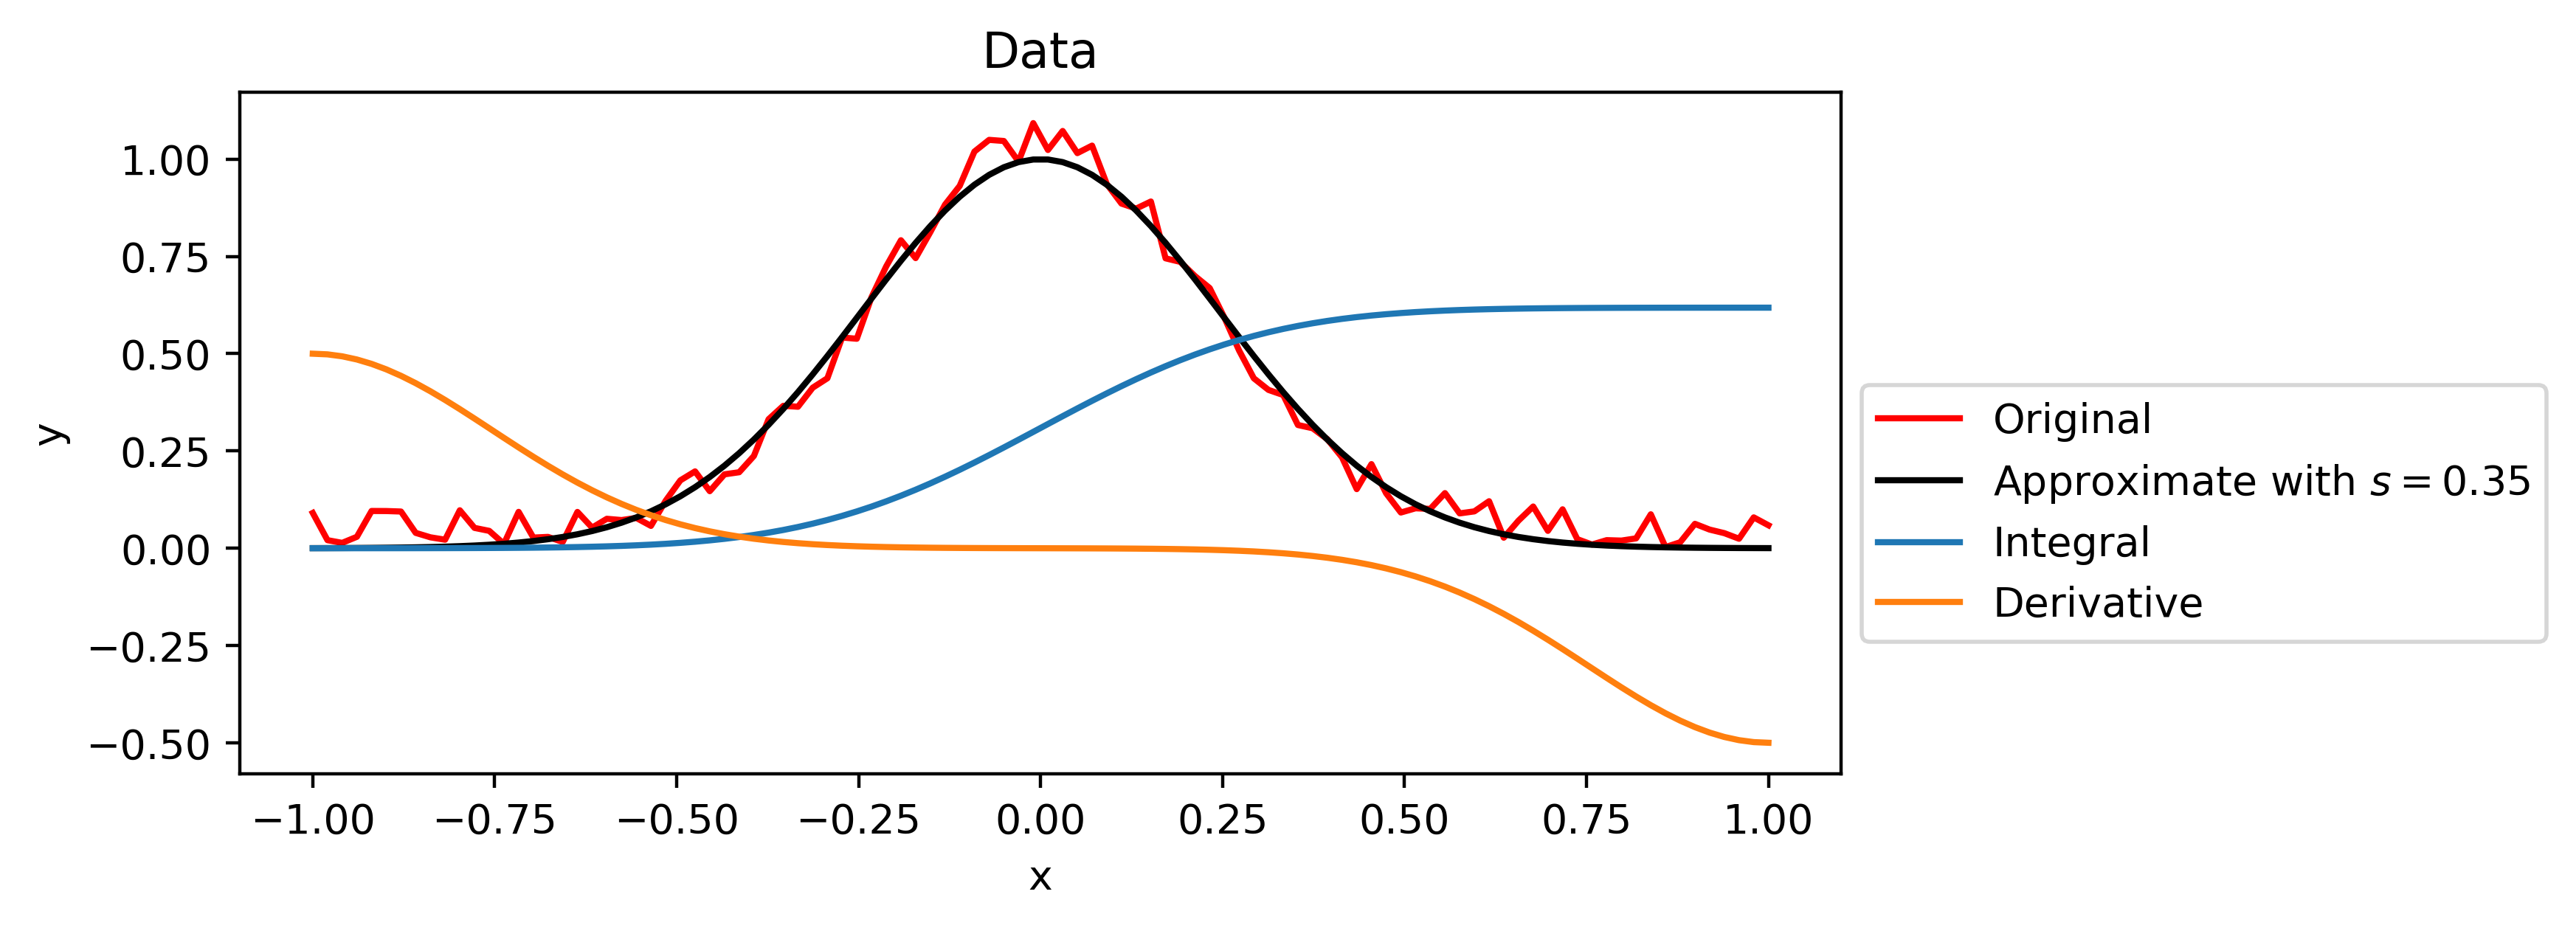

In [117]:
plt.figure(figsize=(7, 3), dpi=400)
plt.plot(x, y, label='Original', c='red')
plt.plot(x, Approx(x, y_rms), c='black', label=f'Approximate with $s={y_rms.round(2)}$')
plt.plot(x, y_int, label='Integral')
plt.plot(x, y_der, label='Derivative')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 0.6))